 #                               <font color=blue>Exploring Factors Causing Heart Disease</font>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler
import scipy.stats as ss
import warnings
from IPython.display import display
#interactive visualization tools
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

### Collected Patient Data Descriptions


In [12]:
path='/Users/murat/Desktop/MuratAl_DS/BAI Data Science Case Study_Heart.xlsx'

In [13]:
data_dict=pd.read_excel(path,index_col=None,sheet_name='Heart_Disease_Patient_Data_Dict',header=3,usecols='B, C')

In [14]:
data_dict

Variable                                        Description
0        age                                       age in years
1        sex                             (1 = male; 0 = female)
2         cp                                    chest pain type
3   trestbps  resting blood pressure (in mm Hg on admission ...
4       chol                         serum cholestoral in mg/dl
5        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
6    restecg               resting electrocardiographic results
7    thalach                        maximum heart rate achieved
8      exang          exercise induced angina (1 = yes; 0 = no)
9    oldpeak  ST depression induced by exercise relative to ...
10     slope          the slope of the peak exercise ST segment
11        ca  number of major vessels (0-3) colored by flour...
12      thal  3 = normal; 2 = fixed defect; 1 = reversable d...
13    target  Flag if the patient has heart disease (1) or n...

### Loading the data

In [15]:
df=pd.read_excel(path,sheet_name='Heart_Disease_Patient_Data',header=3)

In [16]:
df=df.iloc[:,1:]

### What we have in our data set

In [17]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [18]:
df.shape

(303, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### <font color=blue>We have different types of data, all of them are numerical. Some of them are continious, but there are many categorical values:</font>
Looking into what we have as categorical and continious  variables

In [22]:
#Collecting the unique variable names:
unique_val=[]
for x in df.columns:
#         unique_val.append(df[x].value_counts().size)
        unique_val.append(df[x].nunique())
features=pd.DataFrame(unique_val, index=df.columns,columns=["Unique"])
features

Unique
age           41
sex            2
cp             4
trestbps      49
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             5
thal           4
target         2

### List of Categorical and Continous variables:
Each variable in this group has a numeric value which corresponds to a specific condition/symptom or a discrete measure of a condition

In [138]:
categorical=(features[features['Unique']<10].index)

cont=[]
for var in df.columns:
        if var not in  categorical:
            cont.append(var)
categorical
# cont
# categorical.drop('target')

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

### <font color=blue>What does each variable mean and what are their values?

### Complete attribute documentation: 
 <a id="VarDef">VarDef </a>


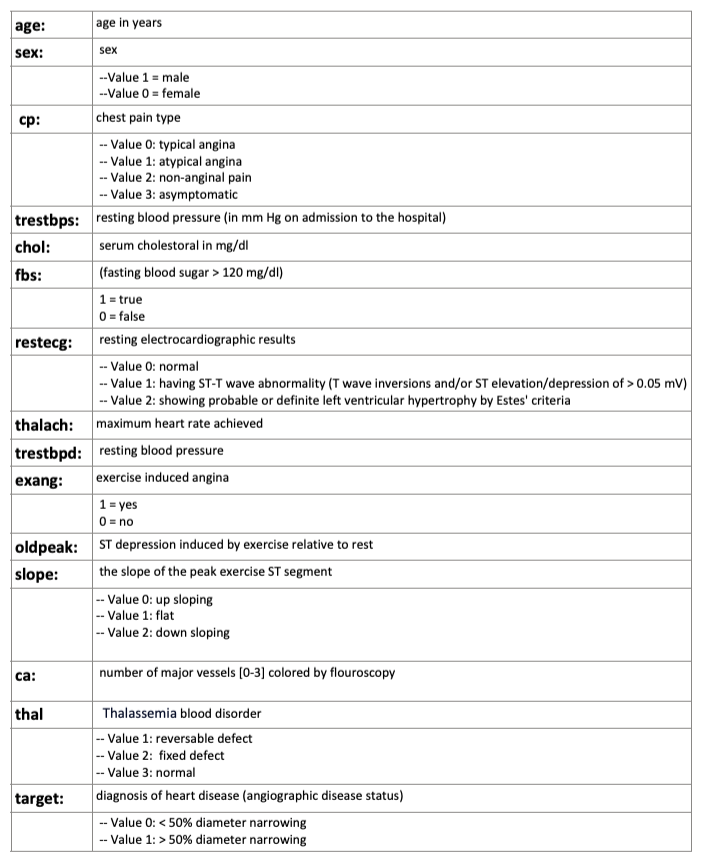

Adopted from and modified:
'https://archive.ics.uci.edu/dataset/45/heart+disease'


### Looking at the distributions of the variables:
Plotting the variable histograms seperately. Blue variables are categorical values.

In [24]:
def grid_plot(n_rows,n_cols,df):
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# Flatten the axes array if needed
    if n_rows > 1:
         axes = axes.flatten()
    else:
        axes = [axes]
    
# Loop through each column and plot a histogram
    for i, column in enumerate(df.columns):
        ax = axes[i]
        
        if df[column].nunique()<7:
            df[column].hist(ax=ax)
        else:
            df[column].hist(ax=ax,color='r')
        ax.set_title(column,fontsize = 18)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Hide any empty subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
# Adjust spacing between subplots and show the plot
    plt.tight_layout()
    plt.show()

In [25]:
df.columns.shape

(14,)

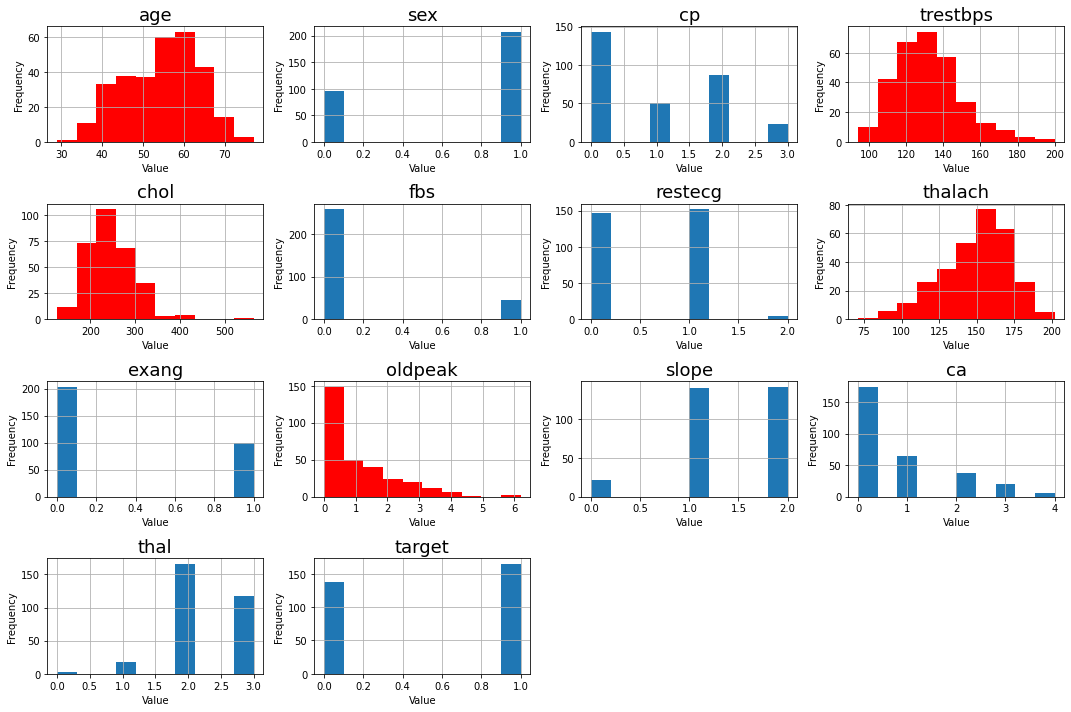

In [26]:
#using the plotting function grid_plot:
grid_plot(4,4,df)

## Variables vs Target 

 <a id="CounterPlots">CounterPlots </a>

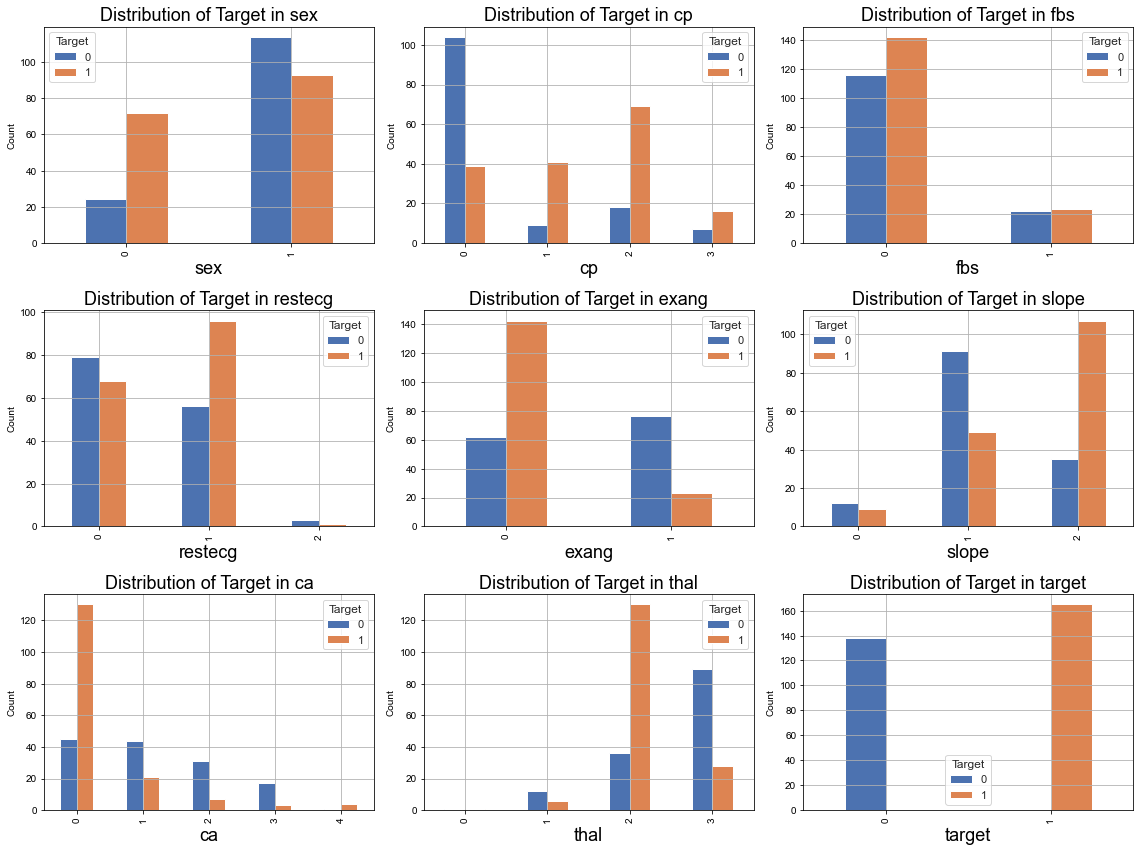

In [27]:
num_rows = 3
num_cols = 3  # Number of subplots per row
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Ensure axes is a 2D array
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, var in enumerate(categorical):
    pivot_table = df.pivot_table(index=var, columns='target', aggfunc='size', fill_value=0)
    # Create a bar plot using Seaborn
    sns.set(style="whitegrid")
    
    pivot_table.plot(kind='bar', stacked=False, ax=axes[i])
    axes[i].set_xlabel(f'{var}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of Target in {var}', fontsize=18)
    axes[i].legend(title='Target')
for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Adjust layout and show the plot
   
# Replace the sample data with your actual DataFrame and adjust the categorical_vars list according to the categorical variables you want to visualize. This code will create a grid of subplots, each containing a bar plot for the distribution of the target variable within a categorical variable.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


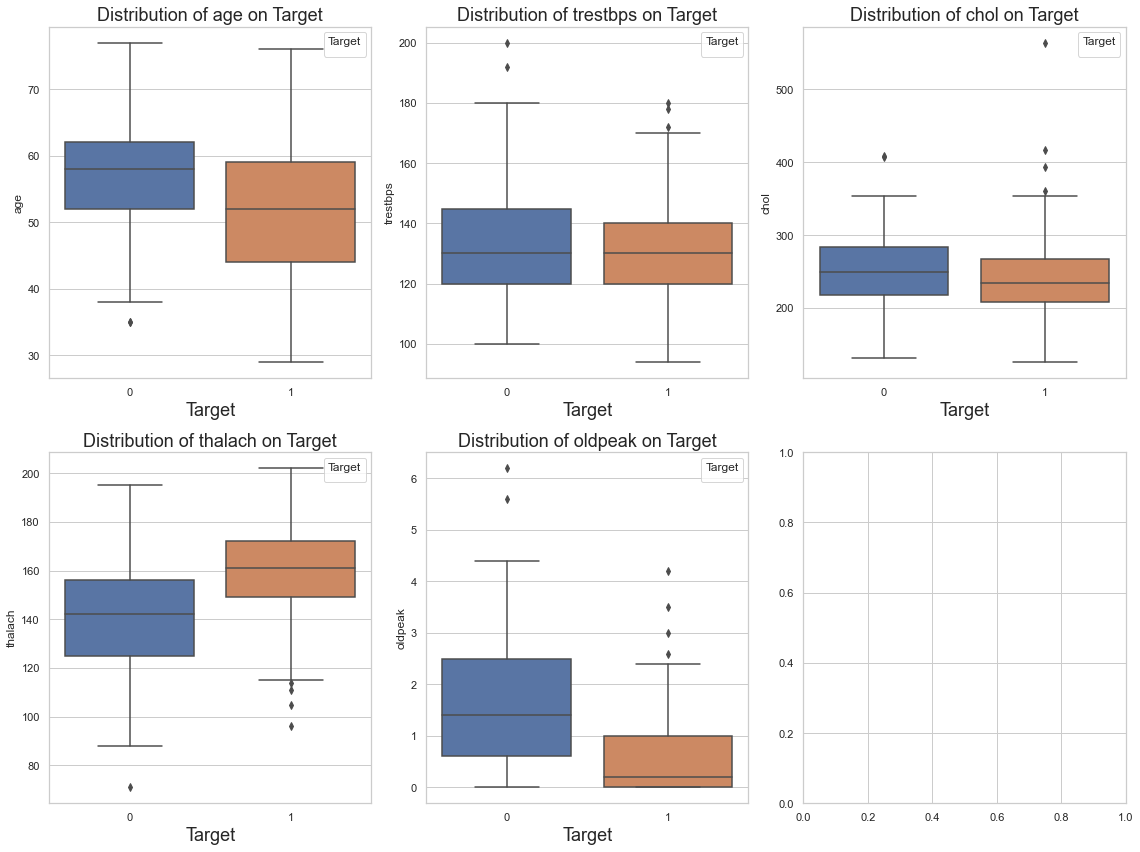

In [150]:
num_rows = 2
num_cols = 3  # Number of subplots per row
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Ensure axes is a 2D array
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, var in enumerate(cont):
    sns.boxplot(y=df[var], x=df['target'], ax=axes[i])
    
    axes[i].set_xlabel('Target', fontsize=18)
    axes[i].set_ylabel(f'{var}')
    axes[i].set_title(f'Distribution of {var} on Target', fontsize=18)
    axes[i].legend(title='Target')

for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')

plt.tight_layout()
plt.show()

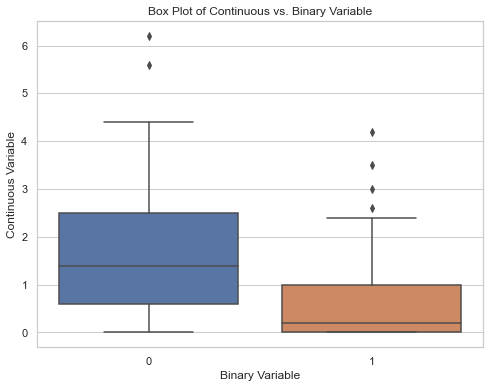

In [152]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.xlabel('Binary Variable')
plt.ylabel('Continuous Variable')
plt.title('Box Plot of Continuous vs. Binary Variable')
plt.show()

## Data Balance Check: 

I checked the distibution of each variable and the target. I will condider these during splintting of the data for train and test sets.

In [28]:
#"Target" column counts
poz_target,neg_target=df['target'].value_counts()
print(f'The number of patients that have HD:{poz_target}')
print(f'The number of patients that DO NOT have HD:{neg_target}')

The number of patients that have HD:165
The number of patients that DO NOT have HD:138


<font color=blue>Data is little bit __skewed towards positive cases__. So using these rates, I will modify the weights in the __Weighted Log Loss function__ to handle the imbalanced distribution of the date set. But for this small data set, __Stratified Sampling__ over the target might help solve this problem.

Splintting patient variables and target as *_X,y_* respectively

In [29]:
X=df.drop(['target'],axis=1)
y=df['target']

In [318]:
# !pip install imblearn
# from imblearn.over_sampling import SMOTE

In [56]:
# smote = SMOTE(sampling_strategy='auto')

In [57]:
# X_resamp,y_resamp=smote.fit_resample(X,y)

In [58]:
# y_resamp.hist()

In [59]:
# X.cp.hist()

## Highly correlated variables with the target

In [30]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

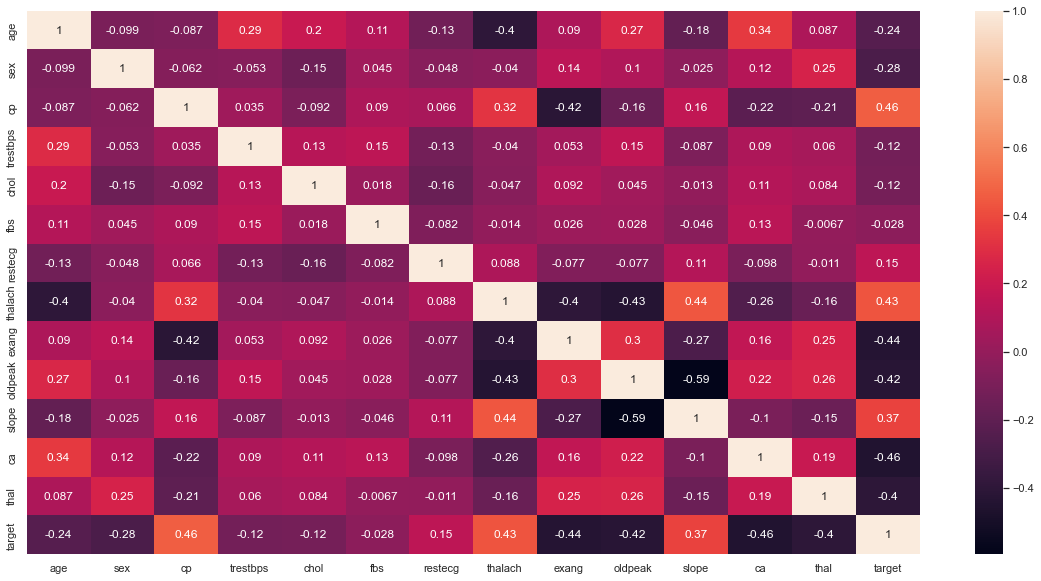

In [31]:
plt.figure(figsize=(20,10))
myBasicCorr = df.corr('spearman')
sns.heatmap(myBasicCorr, annot = True)
plt.show()

<font color=blue>It does not show a very strongly correlated pair on the map. We will be using all of the variables. Also check which parameters have more impact on the target.

In [32]:
df_corr=pd.DataFrame((myBasicCorr.target))


In [33]:
df_target_corr=df_corr.sort_values(by=[('target')], ascending=False)
df_target_corr

target
target    1.000000
cp        0.460860
thalach   0.428370
slope     0.371460
restecg   0.148612
fbs      -0.028046
chol     -0.120888
trestbps -0.121593
age      -0.238400
sex      -0.280937
thal     -0.403299
oldpeak  -0.421487
exang    -0.436757
ca       -0.457607

<font color=blue>We should both consider the top positives and bottom negatives as important. We will than have another check on their weights in the log regression function.

### Let's also see the individual distribution of each variable on a dashboard: 

In [34]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Assuming you already have 'df2' DataFrame
# df2 = ...

# Get a list of all column names
feature_columns = df[cont].columns

# Create subplots
num_rows = 3  # Number of rows in the subplot grid
num_cols = 2  # Number of columns in the subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=feature_columns)

In [35]:
# Loop through each feature column and create box plots
for i, feature in enumerate(feature_columns):
    row = i // num_cols + 1
    col = i % num_cols + 1

    trace = go.Box(
        y=df[cont][feature],
        boxpoints="all",
        jitter=0.3,
        pointpos=-1.5,
        boxmean="sd"
    )

    fig.add_trace(trace, row=row, col=col)
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text="Value", row=row, col=col)

# Update the layout of the entire figure
fig.update_layout(title="Box Plots for Continuous Features", height=800)

# Show the interactive plot
iplot(fig)

In [43]:
fig.write_html('interactive_plot.html')

## Removing the Outliers:
This function picks the outliers beyond the 95% CI and pushes them to the nearest upper or lower CI boundary levels.

In [44]:
# # remove the data out of 95% confidence level 
# def filter_data(df):
#     for col in df.columns:
#         print("Filtering the ",col)
#         if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
#             percentiles = df[col].quantile([0.025,0.975]).values
#             df[col][df[col] <= percentiles[0]] = percentiles[0]
#             df[col][df[col] >= percentiles[1]] = percentiles[1]
#         else:
#             df[col]=df[col]
#     return df

## Base Model - LOGISTIC REGRESSION
For the base model, standardized continuous variables and all other categorical variables are used.
First applied one-hot encoding to the categorical variables.
And then split them into Train and Test sets

Scaled continous variables using z-factor scaling. <font color=red>Here we should be careful not to scale the whole data set.</font> Test and Train set should be scaled within themselves to prevent __data leaking__.


Logistic regression as the base model is applied afterwards.

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
X=df.drop(['target'],axis=1)
y=df['target']

### Applying One-Hot encoding to the categorical variables in the data set


In [47]:
#First removing the "target" from our categorical variables list
categorical=categorical.drop('target')

In [48]:
X_encoded = pd.get_dummies(X, columns=categorical)
X_encoded.head(3)

age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   63       145   233      150      2.3      0      1     0     0     0  ...   
1   37       130   250      187      3.5      0      1     0     0     1  ...   
2   41       130   204      172      1.4      1      0     0     1     0  ...   

   slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0        0     1     0     0     0     0       0       1       0       0  
1        0     1     0     0     0     0       0       0       1       0  
2        1     1     0     0     0     0       0       0       1       0  

[3 rows x 30 columns]

#### One quick check: We are not given a Thal=0 category in the data description, but it appears twice in the data set. We will keep it here but can consider removing it for a performance comparison model run.

In [49]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

### Splitting the data into Train and Test Sets

In [166]:
#Splitting the data set into Train and Test, applying Stratified sampling on Target Column
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,stratify=y,random_state=42)

In [167]:
y_train.value_counts()

1    132
0    110
Name: target, dtype: int64

In [168]:
y_test.value_counts()

1    33
0    28
Name: target, dtype: int64

[Variable Definition Tables](#VarDef)


## Standardizing Continous Variables

In [169]:
scaler=StandardScaler()

X_train[cont]=scaler.fit_transform(X_train[cont])
X_test[cont]=scaler.fit_transform(X_test[cont])


In [170]:
X_train.head(3)

age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_0  \
19   1.610480  0.461840 -0.123235  0.039942  0.604853      1      0     0   
247  1.282051  1.575595  0.023366 -1.373486 -0.890458      0      1     0   
289  0.077810 -0.206413 -0.835301 -0.917541  0.770998      1      0     1   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
19      0     0  ...        1     0     0     1     0     0       0       0   
247     1     0  ...        0     0     0     0     1     0       0       1   
289     0     0  ...        0     0     1     0     0     0       0       0   

     thal_2  thal_3  
19        1       0  
247       0       0  
289       0       1  

[3 rows x 30 columns]

### Appyling Logistic Regression Model:

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [172]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    print(cm)
    plt.figure(figsize=(12,7))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual',fontsize=18)
    plt.xlabel('Predicted',fontsize=18)
    plt.show()

In [173]:
lg0=LogisticRegression()

In [174]:
lg0.fit(X_train,y_train)

LogisticRegression()

In [175]:
y_train_pred_lg0=lg0.predict(X_train)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.86      0.91      0.89       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

[[ 91  19]
 [ 12 120]]


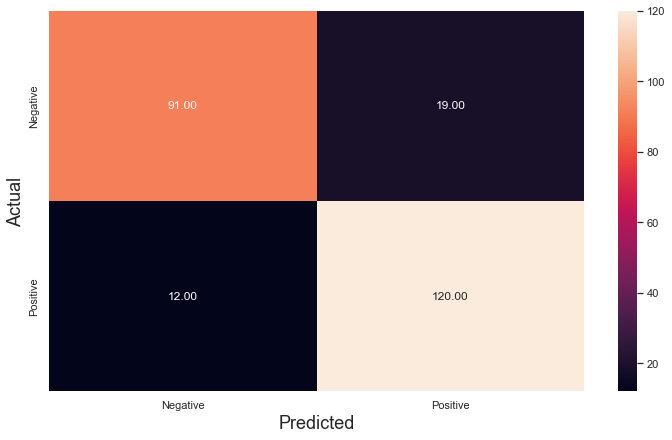

In [176]:
metrics_score(y_train,y_train_pred_lg0)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.86      0.94      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61

[[23  5]
 [ 2 31]]


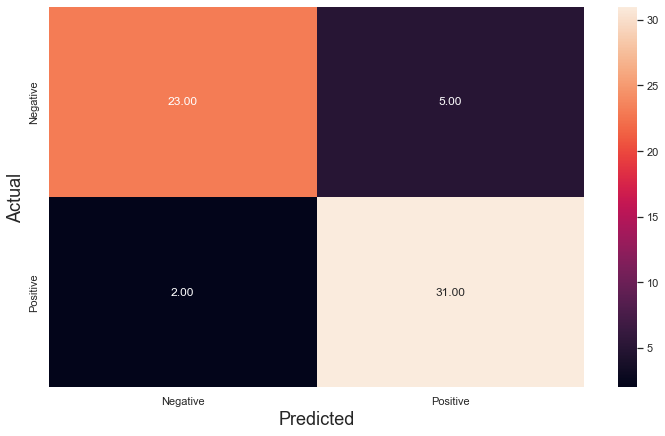

In [177]:
# Checking the performance on the test dataset
y_test_pred_lg0 = lg0.predict(X_test)
metrics_score(y_test, y_test_pred_lg0)

In [179]:
print(f'Accuracy of our Linear Regression Base Model is __{accuracy_score(y_test,y_test_pred_lg0):.2f}')

Accuracy of our Linear Regression Base Model is __0.89


### Looking at the weights of the coefficients:
[Check the Definitions Table](#VarDef)

[Check the Counter plots for each variable against Target values](#CounterPlots)

In [180]:
# Printing the coefficients of logistic regression
col=X_train.columns
coef_lg=lg0.coef_
coeff_lg0=pd.DataFrame(coef_lg,columns=col).T.sort_values(by=0,ascending=False)

<Axes: >

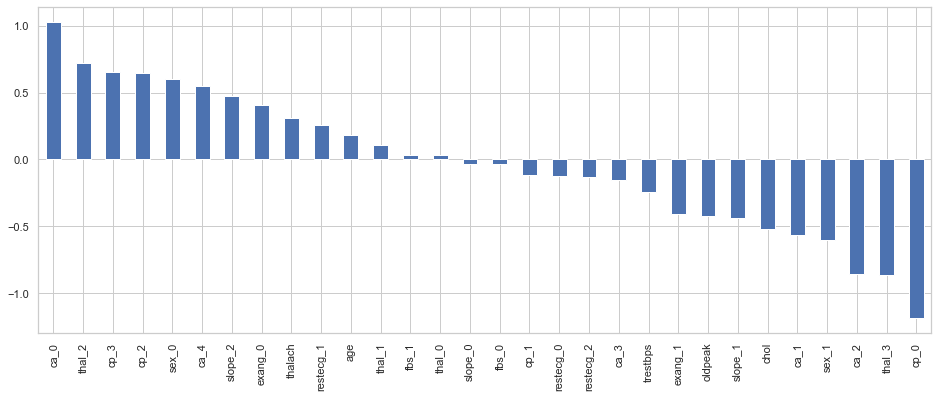

In [181]:
coeff_lg0[0].sort_values(ascending=False).plot.bar(figsize=(16,6))

In [182]:
#lets apply correlation to the encoded data again
df_encoded=pd.concat([X_encoded,pd.DataFrame(y,columns=['target'])],axis=1)

In [183]:
df_encoded.head(3)

age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   63       145   233      150      2.3      0      1     0     0     0  ...   
1   37       130   250      187      3.5      0      1     0     0     1  ...   
2   41       130   204      172      1.4      1      0     0     1     0  ...   

   ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  target  
0     1     0     0     0     0       0       1       0       0       1  
1     1     0     0     0     0       0       0       1       0       1  
2     1     0     0     0     0       0       0       1       0       1  

[3 rows x 31 columns]

<Axes: >

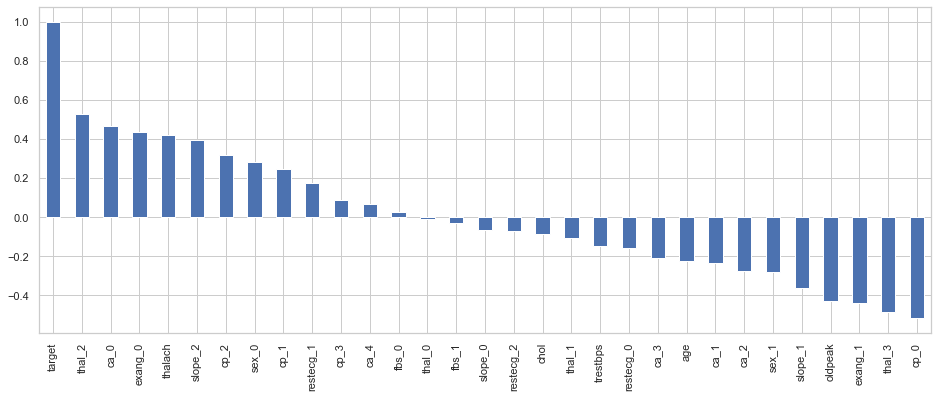

In [184]:
df_encoded_corr=df_encoded.corr()
df_encoded_corr_target=df_encoded_corr['target'].sort_values(ascending=False)
df_encoded_corr_target.plot.bar(figsize=(16,6))

### Hyperparameter Tuning
Checking for combinations of different model parameter using GridSearchCV

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
# param_grid = {
#     'C': [0.01,0.1,1,10],  # Regularization parameter
#     'max_iter': [100, 200, 300],  # Maximum number of iterations
#     'solver': ['liblinear', 'lbfgs', 'saga']
# }
# lg=LogisticRegression()
# # param_grid = {

# # 'C': [0.01, 0.1,0.3, 1.0,1.5,2,10.0],  # Regularization parameter
# #     'solver': ['liblinear', 'lbfgs', 'saga']  # Optimization algorithm
# # }
# grid_search = GridSearchCV(lg, param_grid, cv=7, scoring='accuracy')
# grid_search.fit(X_train, y_train)


In [187]:
# print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
# print("accuracy :",grid_search.best_score_)

In [188]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'solver': ['liblinear', 'lbfgs', 'saga'] }# l1 lasso l2 ridge
# logreg=LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=10)
# logreg_cv.fit(X_train,y_train)

# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [189]:
# Create a Logistic Regression model
lg = LogisticRegression()

# Define hyperparameters and their potential values to tune
param_grid = {
    'C': [0.01, 0.1, 1.0,2,10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'saga']  # Optimization algorithm
}

# Create a GridSearchCV object with the Logistic Regression model and parameter grid
grid_search = GridSearchCV(lg, param_grid, cv=3,scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params_LG = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_LG)


# Train the final model on the entire training set with the best hyperparameters
LG_tuned = LogisticRegression(**best_params_LG)
LG_tuned.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_test_pred_LGtuned = LG_tuned.predict(X_test)

Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/opt/homebrew/lib/python3.9/

In [190]:
 print("Best Hyperparameters:", best_params_LG)


Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}


### Base Model Improved Results:
<a id="BaseLR">BaseLR</a>

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

[[22  6]
 [ 2 31]]


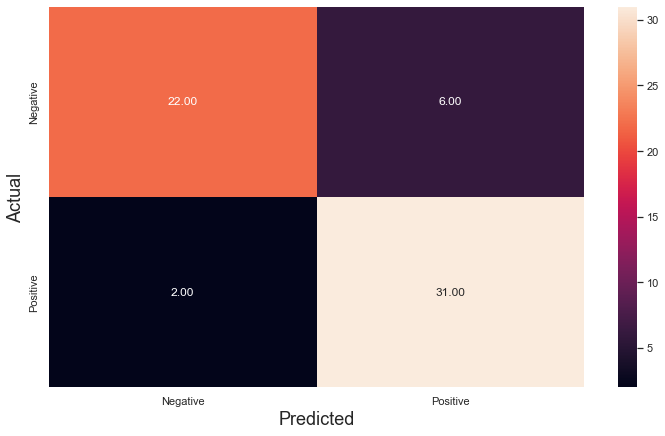

In [191]:
metrics_score(y_test, y_test_pred_LGtuned)

In [192]:
print(f'Results of the base lg model did not improve, it went down to __{accuracy_score(y_test,y_test_pred_LGtuned):.6f}')

Results of the base lg model did not improve, it went down to __0.868852


### Applying the target distribution to apply weighted log loss in our model:

$$ loss^{(i)} = loss_{pos}^{(i)} + los_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$ 

In [193]:
from sklearn.datasets import make_classification

from sklearn.metrics import log_loss
from sklearn.utils.class_weight import compute_sample_weight

In [194]:
# Calculate class weights based on the class distribution
class_weights = {0: y_train.value_counts()[0]/y_train.size, 1: y_train.value_counts()[1]/y_train.size}

# Train a logistic regression model using the custom loss function
lg_modifiedloss = LogisticRegression(solver='liblinear', class_weight=class_weights)
lg_modifiedloss.fit(X_train, y_train)


LogisticRegression(class_weight={0: 0.45454545454545453, 1: 0.5454545454545454},
                   solver='liblinear')

In [195]:
y_test_pred_lg_modifiedloss=lg_modifiedloss.predict(X_test)

In [196]:
accuracy_score(y_test_pred_lg_modifiedloss,y_test)

0.8524590163934426

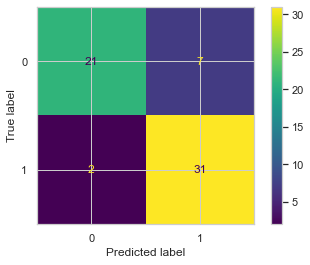

In [197]:
cm2=confusion_matrix(y_test,y_test_pred_lg_modifiedloss,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

It produced lower performance, Stratified sampling have taken care of it.

## Feature Selection

We will use RFE and SVC for our regression model and compare our findings to the correlation and lg model results above.

__Feature Selection with RFE__

In [198]:
from sklearn.feature_selection import RFE

lg_RFE = LogisticRegression(**best_params_LG)
rfe = RFE(estimator = model, n_features_to_select = 20)
fit = rfe.fit(X_train, y_train)

In [199]:
print('Number of features selected:',fit.n_features_)
print('Selected features:',np.array(X_train.columns)[fit.support_])
feat_RFE=np.array(X_train.columns)[fit.support_]

Number of features selected: 20
Selected features: ['trestbps' 'chol' 'thalach' 'oldpeak' 'sex_0' 'sex_1' 'cp_0' 'cp_2'
 'cp_3' 'restecg_1' 'exang_0' 'exang_1' 'slope_1' 'slope_2' 'ca_0' 'ca_1'
 'ca_2' 'ca_4' 'thal_2' 'thal_3']


Applying the lg model on these parameters:

In [200]:
lg_RFE.fit(X_train[feat_RFE],y_train)

LogisticRegression(C=0.1, solver='liblinear')

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.87      0.89      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

[[ 92  18]
 [ 14 118]]


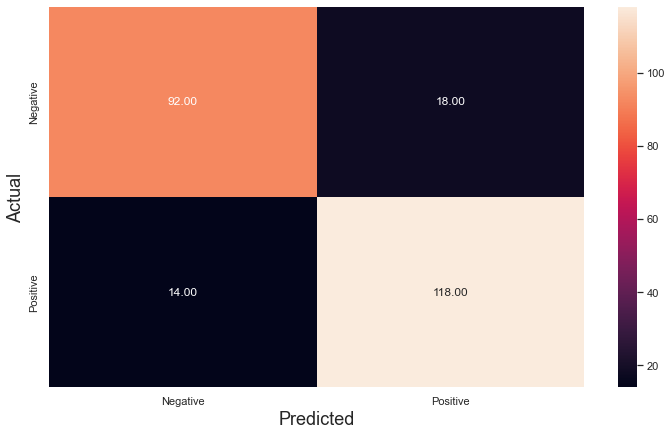

In [201]:
y_train_pred_REF20=lg_RFE.predict(X_train[feat_RFE])
metrics_score(y_train,y_train_pred_REF20)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

[[22  6]
 [ 2 31]]


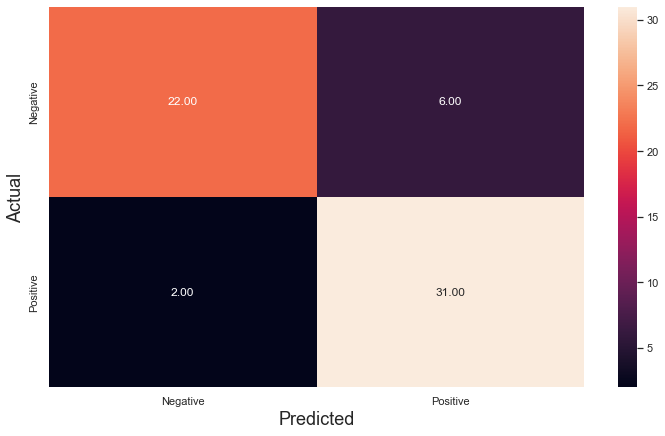

In [202]:
y_test_pred_REF20=lg_RFE.predict(X_test[feat_RFE])
metrics_score(y_test,y_test_pred_REF20)

In [203]:
#Checking the coefficient importances:
pd.DataFrame(lg_RFE.coef_,columns=feat_RFE).T.sort_values(by=0,ascending=False)

0
ca_0       0.568629
thal_2     0.550464
cp_2       0.369487
exang_0    0.311895
sex_0      0.310422
thalach    0.295037
slope_2    0.256616
restecg_1  0.194267
cp_3       0.192312
ca_4       0.065656
trestbps  -0.123223
slope_1   -0.256045
ca_1      -0.256518
ca_2      -0.258859
chol      -0.285484
sex_1     -0.308465
exang_1   -0.309937
oldpeak   -0.410073
thal_3    -0.525768
cp_0      -0.666298

### Observing a drop in the accuracy with the reduced features. This is a small data set, using all features does not affect our computational performance much.

__Applying Feature Selection using SCV:__

In [204]:
from sklearn.feature_selection import SequentialFeatureSelector as SCV
lg_SCV=LogisticRegression(**best_params_LG)
sfs = SCV(lg_SCV, n_features_to_select=15)
sfs.fit(X_train, y_train)



SequentialFeatureSelector(estimator=LogisticRegression(C=0.1,
                                                       solver='liblinear'),
                          n_features_to_select=15)

In [205]:
# Access the selected feature indices
selected_feature_indices = sfs.support_

# Get the selected feature names from the original dataset
selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Names:", selected_feature_names)

Selected Feature Indices: [False  True  True False False  True False  True  True  True  True  True
  True False False  True False False False  True  True  True False False
 False False  True False  True False]
Selected Feature Names: Index(['trestbps', 'chol', 'sex_0', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0',
       'fbs_1', 'restecg_2', 'slope_1', 'slope_2', 'ca_0', 'thal_0', 'thal_2'],
      dtype='object')


In [206]:

feat_SCV15=selected_feature_names

In [207]:
lg_SCV.fit(X_train[feat_SCV15],y_train)

LogisticRegression(C=0.1, solver='liblinear')

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.87      0.90      0.88       132

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

[[ 92  18]
 [ 13 119]]


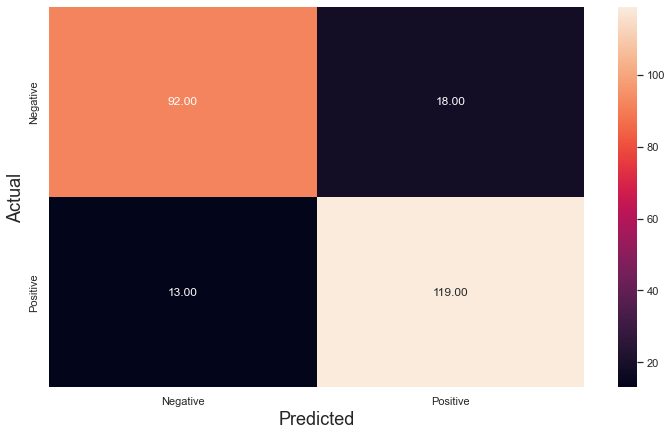

In [208]:
y_train_pred_SCV15=lg_SCV.predict(X_train[feat_SCV15])
metrics_score(y_train,y_train_pred_SCV15)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[21  7]
 [ 5 28]]


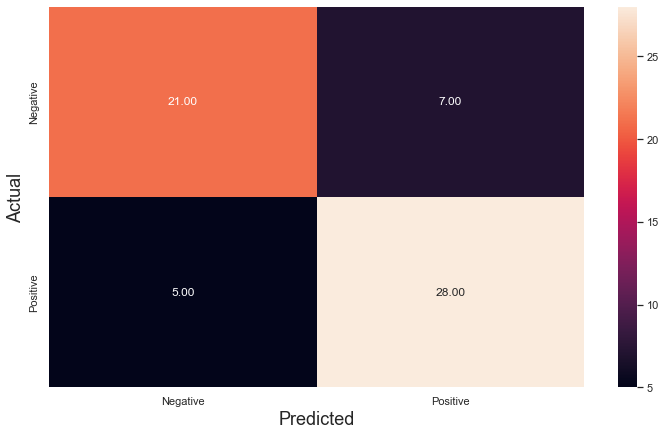

In [209]:
y_test_pred_SCV15=lg_SCV.predict(X_test[feat_SCV15])
metrics_score(y_test,y_test_pred_SCV15)

Using SCV with 15 parameters we achieved the same accuracy with oour base LR model. It has even __a better recall of 94%__ 

In [210]:
#finding the coefficient importances:
SCV15_importance=pd.DataFrame(lg_SCV.coef_,columns=feat_SCV15).T.sort_values(by=0,ascending=False)
SCV15_importance

0
thal_2     0.845386
ca_0       0.694372
sex_0      0.465840
slope_2    0.465712
cp_2       0.386273
cp_1       0.165128
cp_3       0.113180
thal_0     0.014057
restecg_2 -0.054506
fbs_1     -0.110314
fbs_0     -0.150450
trestbps  -0.163564
chol      -0.266272
slope_1   -0.504525
cp_0      -0.925345

## Random Forest Classifier

We will apply it  first to the whole data set, then to the SCV15 data set and compare our results.

In [211]:
#Boruta is good for ensemble models.
# !pip install boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [223]:
rf = RandomForestClassifier(random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

[[110   0]
 [  0 132]]


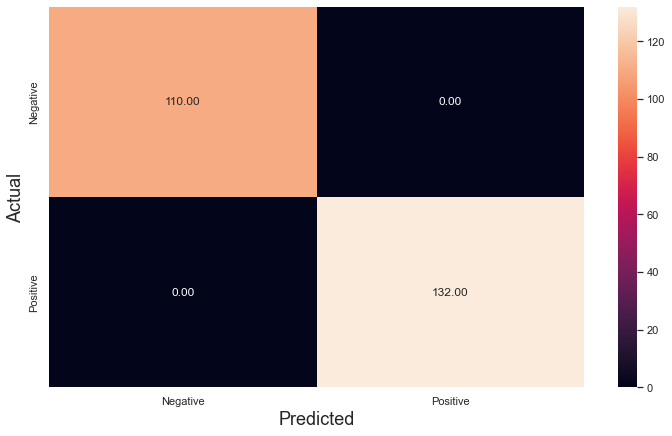

In [224]:
y_train_pred_rf=rf.predict(X_train)
metrics_score(y_train,y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

[[19  9]
 [ 1 32]]


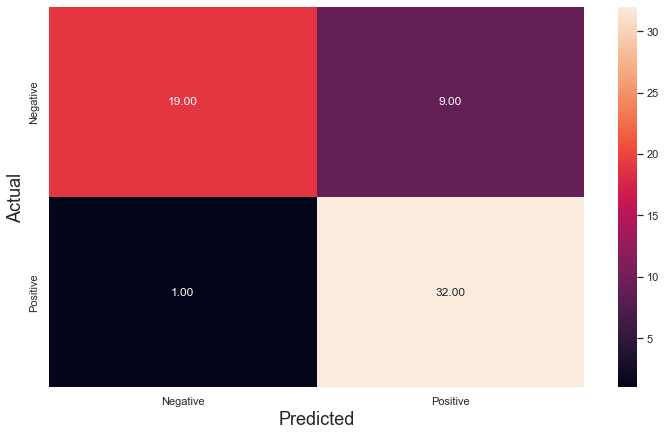

In [225]:
y_test_pred_rf=rf.predict(X_test)
metrics_score(y_test,y_test_pred_rf)

It looks it fit well to the training data and performed well enough on the test set. Let's see how it changes if we apply Gridsearch CV on the parameters.

__Tuning hyperparameters of our RF model:__

In [129]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 60, 90, 100],
    'max_features': [5,10,15,20],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=15, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=20, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total tim

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [30, 60, 90, 100],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [131]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [226]:
rf_tuned=RandomForestClassifier(**grid_search.best_params_)

TypeError: __init__() got an unexpected keyword argument 'C'

In [227]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=5, min_samples_leaf=5,
                       min_samples_split=10)

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

[[18 10]
 [ 3 30]]


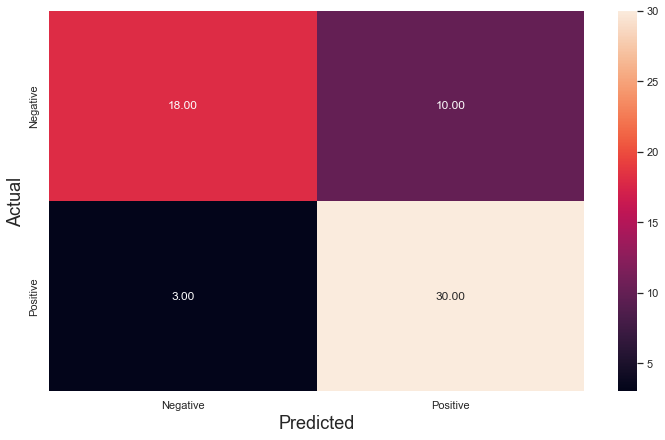

In [228]:
y_test_rf_tuned=rf_tuned.predict(X_test)
metrics_score(y_test,y_test_rf_tuned)

Comparing to 
[Tuned Base LR Model](#BaseLR)

___

## BEST MODELS: 

So far __Random Forest Models  with the tuned parameters prodcued best accuracy ~ 90% and 91% Recall.__ 

 __Log Regression with feature selection achieved 88% accuracy and 94% Recall.__
 
AUC-ROC curves also shows support our conclusion.

Lets quickly check other common methods and then we will move towards model evaluation.

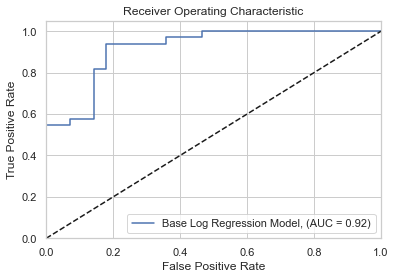

In [229]:
from sklearn.metrics import roc_curve, auc

y_score = lg0.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, label=f'Base Log Regression Model, (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()







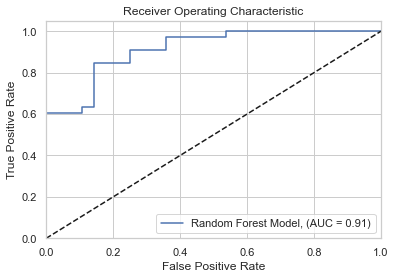

In [230]:
y_score = rf_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, label=f'Random Forest Model, (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### <font color=red> Other Classifiers:

Tested Decesition Tree, Support Vector Machine and XGBoost for comparison. Thet all yield lower accuracies, 80%,82% and 75%, respectively.

**We will move on with LR or RF for further evaluation.**

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt=DecisionTreeClassifier()

In [233]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[21  7]
 [ 5 28]]


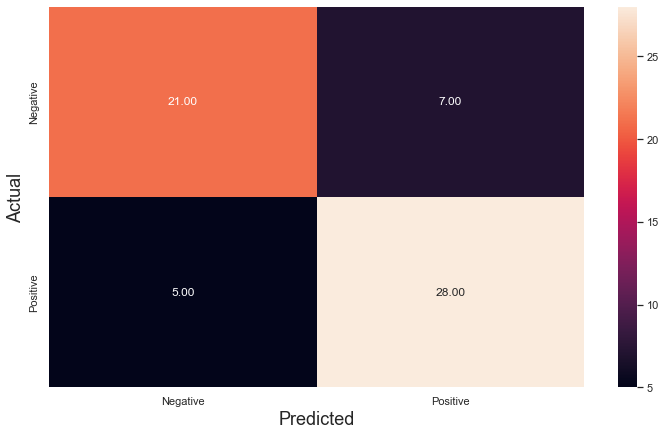

In [234]:
y_test_predDT=dt.predict(X_test)
metrics_score(y_test,y_test_predDT)

In [235]:
from xgboost import XGBClassifier

In [236]:
xgb.fit(X_train,y_train)

NameError: name 'xgb' is not defined

In [237]:
y_test_predXGB=xgb.predict(X_test)
metrics_score(y_test,y_test_predXGB)

NameError: name 'xgb' is not defined

In [238]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

[[21  7]
 [ 2 31]]


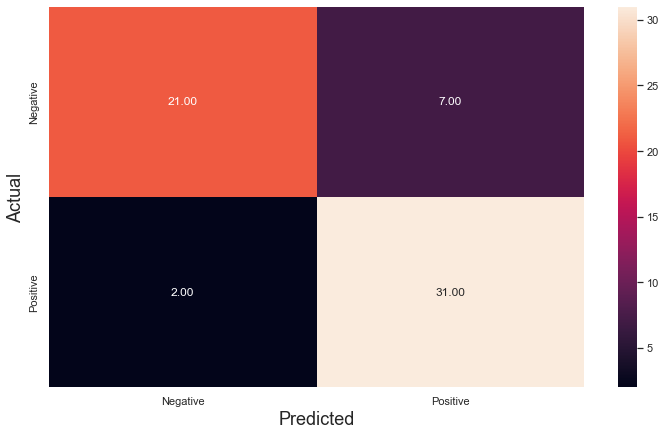

In [239]:
svm.fit(X_train,y_train)
y_test_predSVM=svm.predict(X_test)
metrics_score(y_test,y_test_predSVM)

### Finding out the most important parameters used in our optimized RF model:

In [240]:
#Collecting the feature coeff used in the tuned RF model:
# RF_tuned_feature_importances =pd.DataFrame(rf_tuned.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', 
#                                              ascending=False).head(7)

# RF_tuned_feature_importances


importance
thal_2     0.127334
cp_0       0.119628
oldpeak    0.101017
thal_3     0.095408
thalach    0.072547
ca_0       0.069234
exang_1    0.067070

In [241]:
#Collecting the feature coeff used in the tuned RF model:
RF_feature_importances =pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', 
                                             ascending=False).head(7)

RF_feature_importances

importance
cp_0       0.100621
thal_2     0.090393
oldpeak    0.088128
thalach    0.081627
age        0.071915
chol       0.070422
thal_3     0.066163

### Comparing it to the most important parameters used in the optimized LR model:


In [1123]:
LR_tuned_feature_importances =pd.DataFrame(LG_tuned.coef_.T, index = X_train.columns,columns=['importance']).sort_values('importance', 
                                             ascending=False).head(7)
LR_tuned_feature_importances

importance
ca_0       0.687862
thal_2     0.439253
thalach    0.364322
cp_2       0.349545
sex_0      0.316833
slope_2    0.271392
exang_0    0.261656

In [243]:
#Collecting the feature coeff used in the tuned LGbase model:
LGbase_feature_importances =pd.DataFrame(lg0.coef_.T,index = X_train.columns,columns=['importance']).sort_values('importance', 
                                             ascending=False).head(7)

LGbase_feature_importances

importance
ca_0       1.029714
thal_2     0.720438
cp_3       0.651781
cp_2       0.649327
sex_0      0.599708
ca_4       0.547144
slope_2    0.470758

In [1121]:
df_target_corr

target
target    1.000000
cp        0.460860
thalach   0.428370
slope     0.371460
restecg   0.148612
fbs      -0.028046
chol     -0.120888
trestbps -0.121593
age      -0.238400
sex      -0.280937
thal     -0.403299
oldpeak  -0.421487
exang    -0.436757
ca       -0.457607

## Common indexes in the top 7 parameters

In [766]:
LG_RF_common=LR_tuned_feature_importances.index.intersection(RF_tuned_feature_importances.index)

In [767]:
LG_RF_common

Index(['ca_0', 'thal_2'], dtype='object')

It shows __ca_0__ and the __thal_0__ as the common two important parameters according to two best models. Let's remember what they were and how they are distributed against Target. 

[Check the Distribution Plots Here](#CounterPlots)

[Check the Variable Definitions Table here](#VarDef)

__1) ca_0= Means NONE of the vessels were colored during floroscopy__ 
This makes sense, that show all vessels were blocked which might be a strong cause to Heart Diesese. The distribution plots also show this.

__2) thal=0 case is not actually listed as one of the labels/scores in the dataframe. But it appeared twice in our data set.__ 
In both cases where thal=0, the diagnose was 0. We can consider removing these two off of our data set and try again.


### Let's run our LG_tuned model with the Thal=0 entries removed:


In [810]:
#Our new data without thal=0 entries
df2=df[(df['thal'] != 0)]

In [812]:
#Variables and target values
X2=df2.drop(['target'],axis=1)
y2=df2.target

In [824]:
#Applying one-hot encoding to categorical variables:
X2_encoded = pd.get_dummies(X2, columns=categorical)
# X2_encoded

In [820]:
#Spliting the data set:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded,y2,test_size=0.2,stratify=y2)

In [821]:
#Standardizing (Z=factor)
X2_train[cont]=scaler.fit_transform(X2_train[cont])
X2_test[cont]=scaler.fit_transform(X2_test[cont])


In [823]:
# X2_test

Lets run this new data set on our best models so far:

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

[[20  8]
 [ 4 29]]


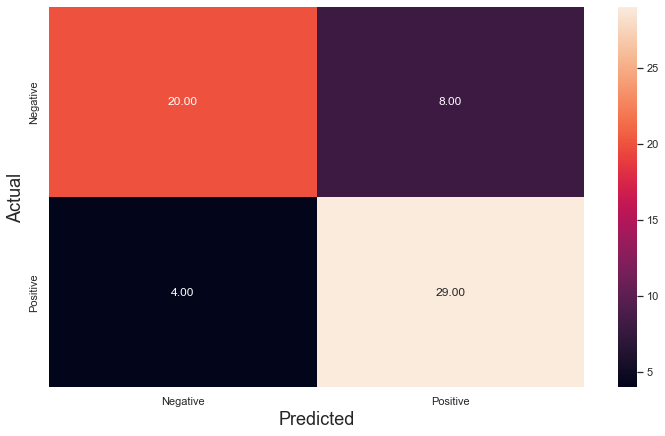

In [827]:
LG_tuned.fit(X2_train,y2_train)
y2_test_pred_LGtuned=LG_tuned.predict(X2_test)
metrics_score(y2_test,y2_test_pred_LGtuned)

### ...not so good!

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

[[21  7]
 [ 5 28]]


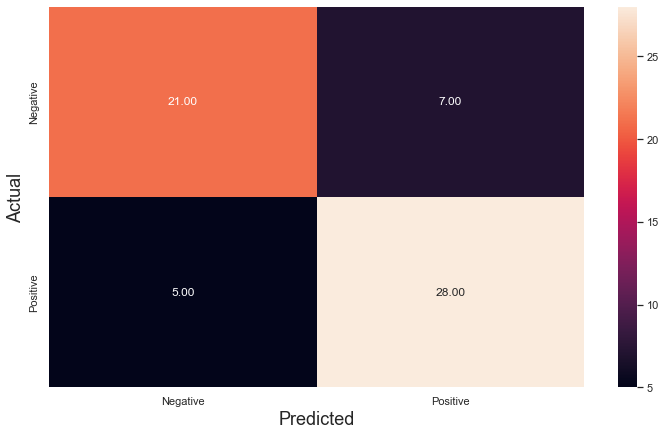

In [829]:
rf_tuned.fit(X2_train,y2_train)
y2_test_pred_RFtuned=rf_tuned.predict(X2_test)
metrics_score(y2_test,y2_test_pred_RFtuned)

###  This is not eitherWe better keep thal=0 !! :)

____
__The Correlation results, most correlated variables with the Target are (3 most positive, 4 most negative)__

PosCorr= cp	,thalach ,slope	

NegaCorr=thal, oldpeak,exang ,ca	

In [1130]:
RF_param=RF_tuned_feature_importances.index
RF_param


Index(['cp_0', 'ca_0', 'thal_2', 'oldpeak', 'thalach', 'thal_3', 'age'], dtype='object')

In [1129]:
LR_param=LR_tuned_feature_importances.index
LR_param

Index(['ca_0', 'thal_2', 'thalach', 'cp_2', 'sex_0', 'slope_2', 'exang_0'], dtype='object')

### Conclusion:

Besides the given data variables, there are many other clinical measures considered during the Heard Disease diognosis. Based only on the data variable given in this data set we have run several ML classifation models and tuned the best performing two, Logistic Regression and Random Forest models, which generated results around 85% and 89% respectively.

Comparing the importance coefficients of the models and parameter correlation values we can conclude that these paramters are critical in diagnosing  Heart disorder.

The top 5 can be listed as follows, each of which exist in all 3 sorted important variable lists.

__cp_0,cp_2,ca_0,thal2,thelach__

We can check how thet look in our [Distribution Counter Plots](#CounterPlots)

